In [10]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.metrics import confusion_matrix
 from sklearn import metrics

In [11]:
 import numpy as np

In [2]:
 import matplotlib.pyplot as plt

In [17]:
 from sklearn.model_selection import train_test_split
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.metrics import confusion_matrix
 from sklearn import metrics

In [13]:
df = pd.read_csv('heart.csv')

In [14]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [15]:
print(df.shape)

(1025, 14)


In [ ]:
print(df.info())

In [ ]:
 print(df.head())

In [ ]:
 print(df['target'].value_counts())

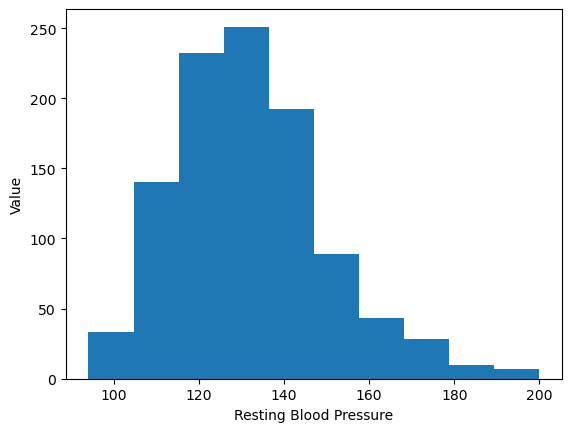

In [16]:
 plt.hist(df['trestbps'])
 plt.xlabel('Resting Blood Pressure')
 plt.ylabel('Value')
 plt.show()


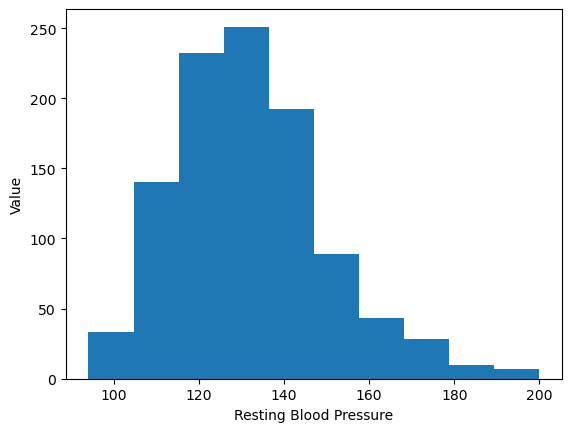

In [17]:
 plt.hist(df['trestbps'])
 plt.xlabel('Resting Blood Pressure')
 plt.ylabel('Value')
 plt.show()


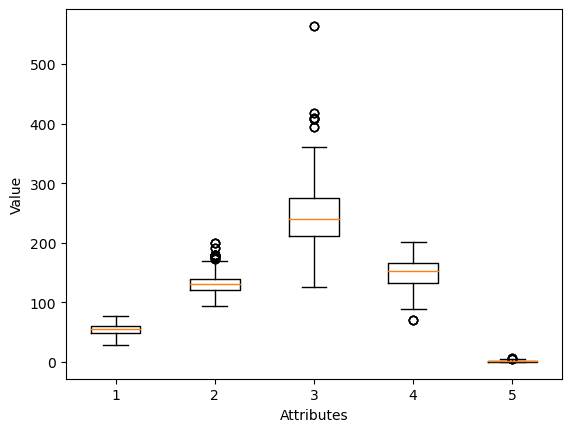

In [18]:
 data_to_boxplot = [df['age'], df['trestbps'], df['chol'], 
 df['thalach'], df['oldpeak']]
 plt.boxplot(data_to_boxplot)
 plt.xlabel('Attributes')
 plt.ylabel('Value')
 plt.show()


In [19]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [20]:
 from sklearn.model_selection import train_test_split

 training_points= df.drop(columns=['target'])
 training_labels= df['target']
 X_train, X_test, y_train, y_test= train_test_split(
           training_points, 
           training_labels, 
           test_size=0.2, 
           random_state=42)
 print(X_train.shape)
 print(y_train.shape)
 print(X_test.shape)
 print(y_test.shape)



(820, 13)
(820,)
(205, 13)
(205,)


In [21]:
 classifier = KNeighborsClassifier(n_neighbors = 5)
 classifier.fit(X_train, y_train)
 guesses = classifier.predict(X_test)
 print(guesses)
 print(confusion_matrix(y_test, guesses))
 print(metrics.accuracy_score(y_test, guesses))

[1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1
 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]
[[74 28]
 [27 76]]
0.7317073170731707


[0.9853658536585366, 0.9560975609756097, 0.9024390243902439, 0.8097560975609757, 0.7317073170731707, 0.6878048780487804, 0.6780487804878049, 0.6682926829268293, 0.7170731707317073, 0.7170731707317073, 0.6878048780487804, 0.6780487804878049, 0.6780487804878049, 0.7170731707317073, 0.7073170731707317, 0.6926829268292682, 0.6780487804878049, 0.7073170731707317, 0.7121951219512195, 0.7170731707317073, 0.7073170731707317, 0.6926829268292682, 0.6829268292682927, 0.6780487804878049, 0.6926829268292682, 0.7024390243902439, 0.7024390243902439, 0.6926829268292682, 0.697560975609756, 0.6731707317073171, 0.6682926829268293, 0.6439024390243903, 0.6487804878048781, 0.6390243902439025, 0.6585365853658537, 0.6536585365853659, 0.6585365853658537, 0.6341463414634146, 0.6634146341463415, 0.6536585365853659, 0.6585365853658537, 0.6390243902439025, 0.6341463414634146, 0.624390243902439, 0.624390243902439, 0.6, 0.6341463414634146, 0.6195121951219512, 0.6048780487804878]


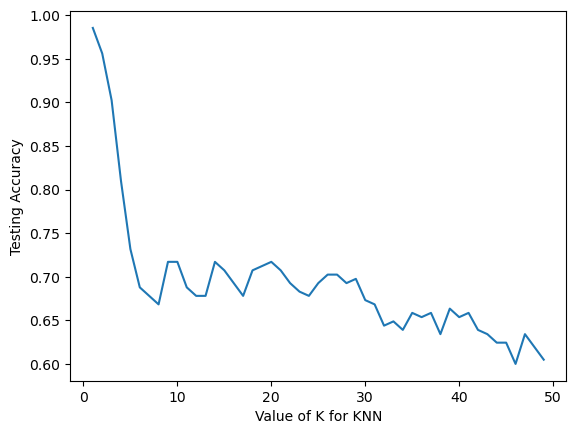

In [22]:
 k_range= range(1, 50)
    
 accuracy_scores= []

 for k in k_range:
     classifier = KNeighborsClassifier(n_neighbors= k)
     classifier.fit(X_train, y_train)
     guesses = classifier.predict(X_test)
     accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
 print(accuracy_scores)

 #Visualize the result of KNN accuracy with matplotlib
 plt.plot(k_range, accuracy_scores)
 plt.xlabel('Value of K for KNN')
 plt.ylabel('Testing Accuracy')
 plt.show()


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. 원본 데이터 복사
df_model = df.copy()



# 3. StandardScaler로 정규화
scaler = StandardScaler()

features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_model[features] = scaler.fit_transform(df_model[features])

# 4. 입력(X)과 출력(y) 분리
training_points = df_model.drop(columns=['target'])
training_labels = df_model['target']

# 5. 훈련/테스트 데이터 분할 (예: 70:30)
X_train, X_test, y_train, y_test = train_test_split(
    training_points,
    training_labels,
    test_size=0.3,
    random_state=4
)

# 6. 데이터 크기 확인
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (717, 13)
y_train: (717,)
X_test: (308, 13)
y_test: (308,)
